In [184]:
import iris
import glob
import numpy as np
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.coord_categorisation
import seawater as sw


In [214]:
def area_avg(cube):
#     first_dim = cube.coord(dimensions=1).long_name #latitude
#     second_dim = cube.coord(dimensions=2).long_name #longitude
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    area_avged_cube = cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)
    return area_avged_cube


def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region

In [19]:
directory = '/Users/ph290/Downloads/cmip6_data/'

In [20]:
chl_files = glob.glob(directory+'chlos_*.nc')

['/Users/ph290/Downloads/cmip6_data/chlos_Omon_CESM2_ssp585_r1i1p1f1_gr_regrid.nc', '/Users/ph290/Downloads/cmip6_data/chlos_Omon_GFDL-CM4_ssp585_r1i1p1f1_gr_regrid.nc', '/Users/ph290/Downloads/cmip6_data/chlos_Omon_CanESM5_ssp585_r1i1p1f1_gn_regrid.nc', '/Users/ph290/Downloads/cmip6_data/chlos_Omon_IPSL-CM6A-LR_ssp585_r1i1p1f1_gn_regrid.nc', '/Users/ph290/Downloads/cmip6_data/chlos_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_regrid.nc']


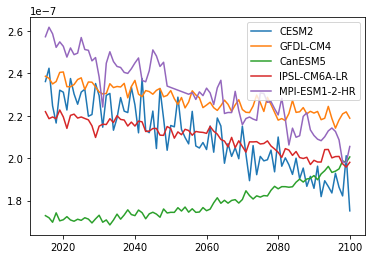

In [48]:
print chl_files

for file in chl_files:
    model = file.split('/')[-1].split('_')[2]
    c = iris.load_cube(file)
    iris.coord_categorisation.add_year(c, 'time', name='year')
    c_aa = area_avg(c)
    y_year = c.coord('year').points
    y = c_aa.data
    if model == 'IPSL-CM6A-LR':
        y /= 1e3
    if model == 'MPI-ESM1-2-HR':
        y *= (12.0/44.0)
    plt.plot(y_year,y,label = model)
    

plt.legend()
plt.show()

In [76]:
my_min,my_max = -0.3,0.3

In [102]:
cube = iris.load_cube('/Users/ph290/Downloads/cmip6_data/chlos_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_*_regrid.nc')
# cube = cube[:,0,:,:]
cube  *= (12.0/44.0)
# cube /= 1e3
cube *= 1.0e6

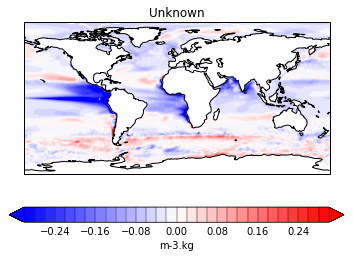

In [103]:
my_range = np.linspace(my_min,my_max,31)
qplt.contourf(cube[-21:-1].collapsed('time',iris.analysis.MEAN) - cube[0:20].collapsed('time',iris.analysis.MEAN),my_range,extend='both',cmap='bwr')
plt.gca().coastlines()

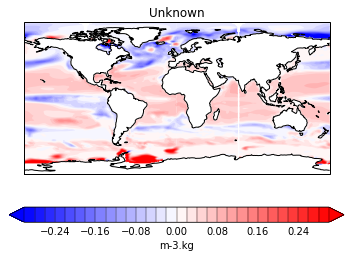

In [89]:
can_cube = iris.load_cube('/Users/ph290/Downloads/cmip6_data/chlos_Omon_CanESM5_ssp585_r1i1p1f1_gn_regrid.nc')
can_cube *= 1.0e6
my_range = np.linspace(my_min,my_max,31)
qplt.contourf(can_cube[-21:-1].collapsed('time',iris.analysis.MEAN) - can_cube[0:20].collapsed('time',iris.analysis.MEAN),my_range,extend='both',cmap='bwr')
plt.gca().coastlines()

In [69]:
can_cube

<iris 'Cube' of unknown / (meter^-3-kilogram) (time: 86; latitude: 180; longitude: 360)>

# obs

In [155]:
file = '/Users/ph290/Downloads/obs/ESACCI-OC-L3S-CHLOR_A_regridded.nc'

In [156]:
obs_cube = iris.load_cube(file)
# print np.maxobs_cube.data)
obs_cube_yr = obs_cube.collapsed('time',iris.analysis.MEAN)

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:280: UserWarning: Missing CF-netCDF ancillary data variable u'chlor_a_log10_rmsd', referenced by netCDF variable u'chlor_a'
  warnings.warn(message % (name, nc_var_name))
/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:280: UserWarning: Missing CF-netCDF ancillary data variable u'chlor_a_log10_bias', referenced by netCDF variable u'chlor_a'
  warnings.warn(message % (name, nc_var_name))


In [167]:
c2 = obs_cube_yr.copy()
c2.data = np.log(obs_cube_yr.data)


/Users/ph290/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


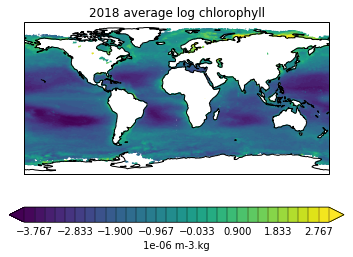

In [169]:
# plt.figure(figsize=(10,5))
qplt.contourf(c2,np.linspace(-4.0,3.0,31),extend='both')
plt.title('2018 average log chlorophyll')
plt.gca().coastlines()
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/presentations/IOP_2019/chl_esacci_2018.png',dpi=600)

In [321]:
woa_t = iris.load('/Users/ph290/Downloads/obs/woa18_decav_t00_01.nc','sea_water_temperature')[0][0]
woa_s = iris.load('/Users/ph290/Downloads/obs/woa18_decav_s00_01.nc','sea_water_salinity')[1][0]

pressure calculated below, but not needed for potential density

In [326]:

woa_s_data = woa_s.data.copy()
woa_t_data = woa_t.data.copy()
woa_p_data = woa_s.data.copy()

# depths = woa_s.coord('depth').points
# latitudes = woa_s.coord('latitude').points
# longitudes = woa_s.coord('longitude').points

# for y,lat in enumerate(latitudes):
#     for x,lon in enumerate(longitudes):
#         for z,d in enumerate(depths):
#             woa_p_data[z,y,x] = sw.pres(d,lat)



In [332]:
woa_rho = woa_s.copy()
woa_rho_data = woa_rho.data.copy()

woa_rho_data = sw.dens(woa_s_data,woa_t_data,woa_p_data)
# woa_rho_data = sw.dens0(woa_s_data,woa_t_data)
woa_rho.data = woa_rho_data

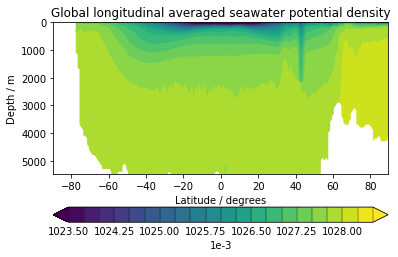

In [342]:
lon_west,lon_east,lat_south,lat_north = -180,180,-90,90
woa_rho_region = extract_region(woa_rho,lon_west,lon_east,lat_south,lat_north)
plt.close('all')

qplt.contourf(woa_rho_region.collapsed('longitude',iris.analysis.MEAN),np.linspace(1023.5,1028.5,21),extend='both')


plt.title('Global longitudinal averaged seawater potential density')
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/presentations/IOP_2019/atlantic_ocean_denisty.png',dpi=600)